<a href="https://colab.research.google.com/github/dhsolutionspak/MSCUI/blob/main/Youtube_Comments_Sentiment_Analysis_Mudassir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datasnaek_youtube_path = kagglehub.dataset_download('datasnaek/youtube')

print('Data source import complete.')


100%|██████████| 55.9M/55.9M [00:00<00:00, 97.0MB/s]

Extracting files...


Data source import complete.


## Importing The Libaries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("/content"))

['.config', 'USvideos.csv', 'UScomments.csv', 'sample_data']


In [ ]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [17]:
US_comments = pd.read_csv('/content/UScomments.csv', on_bad_lines='skip')

In [18]:
US_videos = pd.read_csv('/content/USvideos.csv', on_bad_lines='skip')


In [19]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


## Let's do some analysis and Data Cleaning on both the datasets.

In [20]:
US_videos.shape

(7992, 11)

In [21]:
US_videos.nunique()

,0
video_id,2364
title,2398
channel_title,1230
category_id,16
tags,2204
views,7939
likes,6624
dislikes,2531
comment_total,4152
thumbnail_link,2364


In [22]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB


In [23]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [24]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [25]:
US_comments.shape

(691400, 4)

In [26]:
US_comments.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [27]:
US_comments.dropna(inplace=True)

In [28]:
US_comments.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


In [29]:
US_comments.shape

(691374, 4)

In [30]:
US_comments.nunique()

,0
video_id,2266
comment_text,434075
likes,1284
replies,479


In [31]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  object
 3   replies       691374 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [32]:
US_comments.drop(41587, inplace=True)

In [33]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [34]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [35]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Removing Punctuations, Numbers and Special Characters.

In [36]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words.

In [37]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Changing the text to lower case.

In [38]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

## Tokenization

In [39]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

,comment_text
0,"[logan, paul, it's, ‼️‼️‼️]"
1,"[i've, been, following, from, start, your, vin..."
2,"[kong, maverick]"
3,[attendance]
4,[trending]


## Lemmatization

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [41]:
wnl = WordNetLemmatizer()

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])
tokenized_tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,comment_text
0,"[logan, paul, it's, ‼️‼️‼️]"
1,"[i've, been, following, from, start, your, vin..."
2,"[kong, maverick]"
3,[attendance]
4,[trending]


In [45]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [46]:
US_comments['comment_text'] = tokenized_tweet

## Let's do the Sentiment Analysis on the US Comments Dataset

In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [49]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [50]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul it's ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,i've been following from start your vine chann...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [51]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [52]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul it's ‼️‼️‼️,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,i've been following from start your vine chann...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [53]:
US_comments.Sentiment.value_counts()

,count
Sentiment,
Positive,298050
Neutral,268779
Negative,124544


## Now we will calculate the percentage of comments which are positive in all the videos.

In [54]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Making a dataframe of the videos with their Positive Percentages.

In [55]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [56]:
Positivity.columns = ['video_id','Positive Percentage']

In [57]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,33.62
1,cLdxuaxaQwc,36.55
2,WYYvHb03Eog,34.25
3,sjlHnJvXdQs,37.38
4,cMKX2tE5Luk,41.29


## Now we will add the channel name of the videos which are their in our new dataset.

In [58]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [59]:
Positivity['Channel'] = channels

In [60]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,33.62,Logan Paul Vlogs
1,cLdxuaxaQwc,36.55,PewDiePie
2,WYYvHb03Eog,34.25,The Verge
3,sjlHnJvXdQs,37.38,jacksfilms
4,cMKX2tE5Luk,41.29,A24


In [61]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
132,f5F2whaRzqw,100.0,Kerry Wong
395,cviyIIvBlto,100.0,Kerry Wong
424,jLa9wZHiqxg,100.0,Rad Universe
466,S-a8NVEUO4E,100.0,E! Live from the Red Carpet
601,wBjAmThxDpA,100.0,Vertical Entertainment LA
612,_zl2GV89_GM,100.0,Cosmic Book News
821,lJj66BCiZWQ,100.0,Eric Blattberg
972,BNRUV3TuExQ,100.0,Fathom Events
1317,zuKX0fPlo2Q,100.0,Thomas Bikias
1454,Ekc7lWx0468,100.0,The Illusion contest


## So these are the videos and their channels whose comments are 100% Positive (Well, this might be less likely because NLTK is poor with sarcasmic comments but i can say that most of the comments are positive).

In [62]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
117,3hq2c9vdfls,0.0,Cal Bears
151,7Ag2oDIeLvo,0.0,OsbornTramain
386,Y7tLoqNjkks,0.0,RAW
420,p7sooI96zPI,0.0,Geezus66
468,Oz88_p125uM,0.0,ViralVideoUK
592,BfxOimRxXvU,0.0,Andro Hack
604,k8LF_FU2luY,0.0,Bollinger Motors
611,tbDr_zAcM5g,0.0,Maharishi University of Management
629,HpxsQ1_UAec,0.0,Manto kay SO Afsanay
811,EZaPeQ2dxh8,0.0,Malhar Takle


## So these are the videos and their channels whose comments are 0% Positive (Means the comments are either Negative or Neutral. This stat is also less likely but as i said earlier, MOSTLY).

## Let's Contstruct a wordcloud of all the comments to see the most frequent comments.

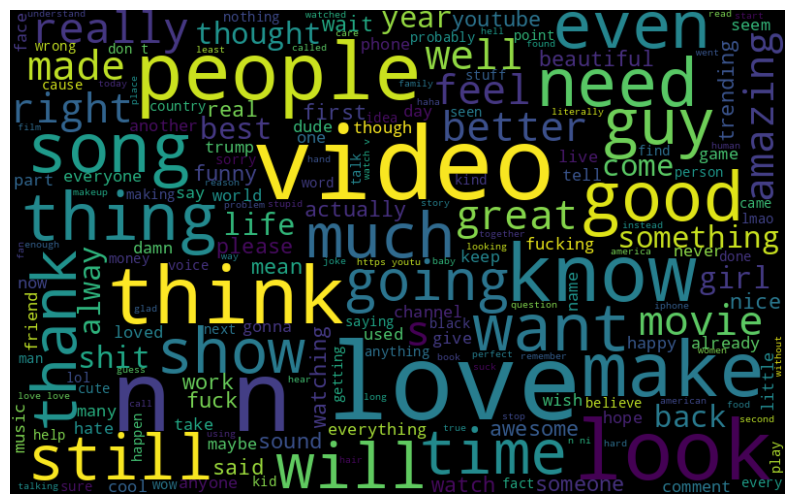

In [63]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Positive Comments

In [64]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

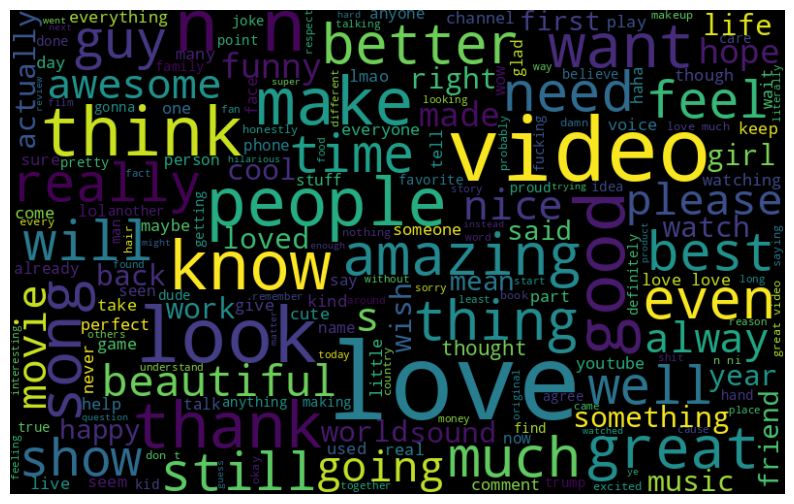

In [65]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Negative Comments

In [66]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

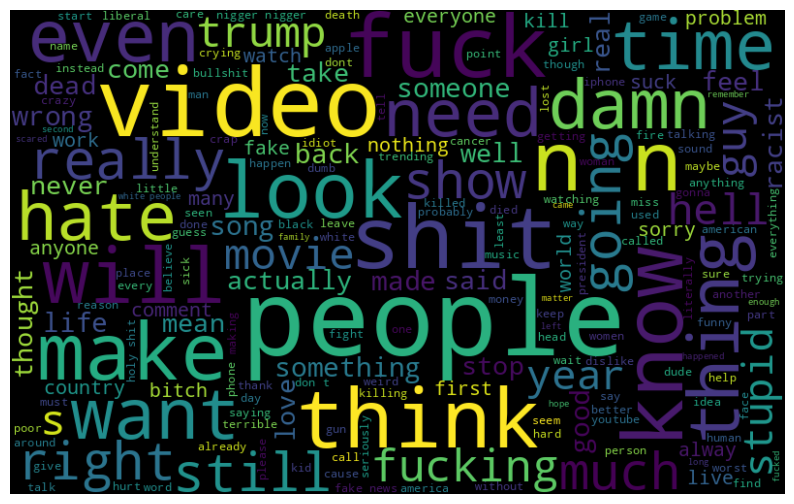

In [67]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Contsruct a Wordcloud of Neutral Comments.

In [68]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

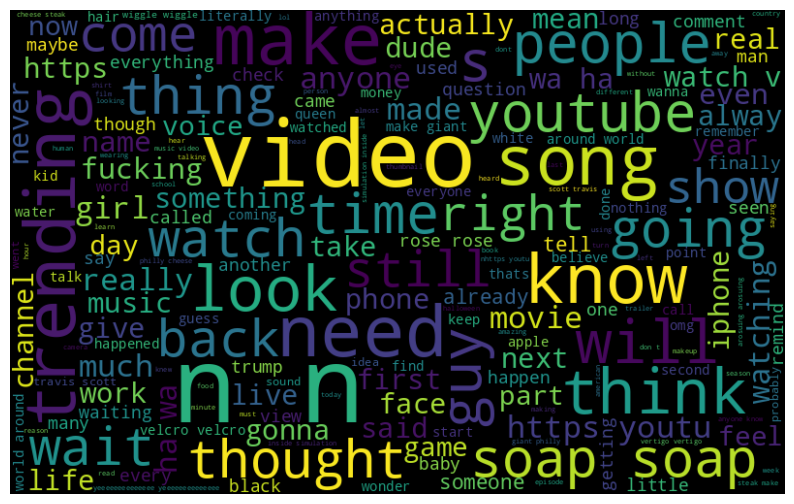

In [69]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

BERT Fine-tuning Implementation: [4]
● Follow the methodology outlined in the paper to preprocess the data, fine-tune the
model, and evaluate its performance.
● Use appropriate evaluation metrics (e.g., accuracy, precision, recall, F1 score) to assess
the model's performance.

In [70]:
!pip install transformers datasets scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [77]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

In [78]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [79]:
def tokenize_data(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=512)

In [83]:
import pandas as pd

df = pd.read_csv('/content/UScomments.csv', on_bad_lines='skip')

print(df.head())


      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  


In [85]:
print(df.dtypes)


video_id        object
comment_text    object
likes           object
replies         object
dtype: object


In [86]:
# Ensure uniform data types
df['likes'] = pd.to_numeric(df['likes'], errors='coerce').fillna(0).astype(int)
df['replies'] = pd.to_numeric(df['replies'], errors='coerce').fillna(0).astype(int)

In [87]:

# Rename columns if necessary (adjust column names based on your dataset)
df = df.rename(columns={'comment_text': 'text', 'video_id': 'label'})  # Update 'label' column to match classification target

In [88]:
# Convert DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)


In [89]:
# Split the dataset into train, validation, and test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_test_split = dataset['train'].train_test_split(test_size=0.2, seed=42)

final_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': train_test_split['test'],
    'test': dataset['test']
})


In [90]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [92]:
# Tokenize the dataset
def tokenize_data(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=512)

tokenized_dataset = final_dataset.map(tokenize_data, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(['text'])  # Remove original text column
tokenized_dataset = tokenized_dataset.rename_column('text', 'comments')  # Rename label column for Trainer compatibility
tokenized_dataset.set_format('torch')

Map:   0%|          | 0/442496 [00:00<?, ? examples/s]

ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [ ]:
# Load pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

In [ ]:
# Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    save_total_limit=2
)

In [ ]:
# Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


In [ ]:
# Fine-tune the model
trainer.train()

In [ ]:
# Evaluate on the test set
test_results = trainer.evaluate(tokenized_dataset['test'])
print("Test Results:", test_results)


In [ ]:
# Save the fine-tuned model and tokenizer
model.save_pretrained('./fine_tuned_model')
tokenizer.save_pretrained('./fine_tuned_model')